In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset from Excel file
file_path = 'Online_Retail.xlsx'  # Make sure the file is in the same directory as your notebook
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values
data_cleaned = data.dropna()

# Verify that missing values are handled
missing_values_after_cleaning = data_cleaned.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Ensure data_cleaned is a separate DataFrame
data_cleaned = data.dropna().copy()

# Calculate total purchase amount for each customer
data_cleaned['TotalPurchase'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Group data by CustomerID to calculate features
customer_features = data_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency: Number of unique invoices
    'TotalPurchase': 'sum',  # Monetary: Total purchase amount
    'StockCode': 'count'     # Quantity: Total number of items purchased
}).reset_index()

# Rename columns for clarity
customer_features.rename(columns={
    'InvoiceNo': 'Frequency',
    'TotalPurchase': 'Monetary',
    'StockCode': 'Quantity'
}, inplace=True)

# Display the first few rows of the customer features
customer_features.head()

,CustomerID,Frequency,Monetary,Quantity
0,12346.0,2,0.00,2
1,12347.0,7,4310.00,182
2,12348.0,4,1797.24,31
3,12349.0,1,1757.55,73
4,12350.0,1,334.40,17


In [9]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = customer_features[['Frequency', 'Monetary', 'Quantity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the scaled features
scaled_features[:5]

array([[-0.32936215, -0.23100099, -0.3917197 ],
       [ 0.20610242,  0.29343167,  0.38265697],
       [-0.11517632, -0.01231622, -0.26695902],
       [-0.43645506, -0.01714563, -0.08627113],
       [-0.43645506, -0.19031183, -0.32718831]])

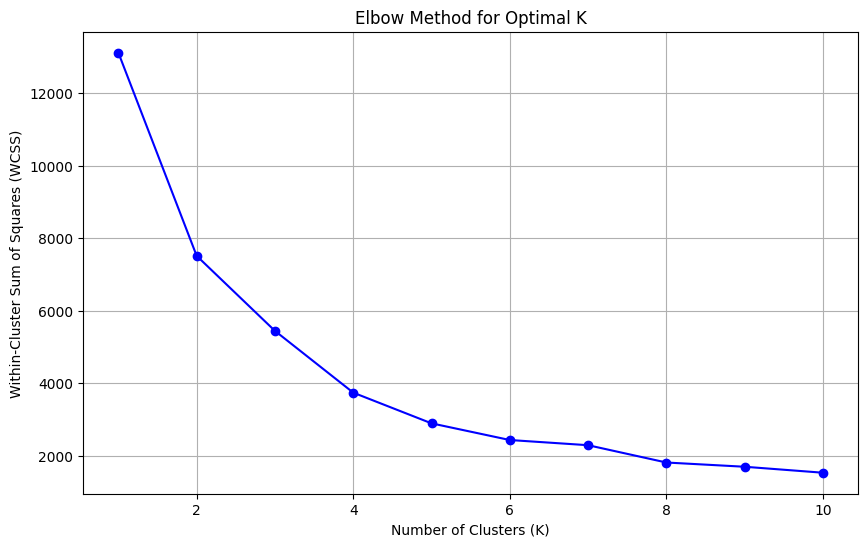

In [10]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of K values to test
k_values = range(1, 11)

# Calculate WCSS for each K
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

### **Elbow Method and K-Means Clustering: A Detailed Explanation**

---

### **1. Elbow Method: Overview**

The **Elbow Method** is a widely used technique to determine the optimal number of clusters (\( K \)) for the **K-Means clustering algorithm**. It relies on calculating the **Within-Cluster Sum of Squares (WCSS)** for different values of \( K \) and identifying the "elbow point" where adding more clusters no longer significantly reduces WCSS.

#### **Key Components of the Elbow Method:**
- **X-axis (Number of Clusters, \( K \))**: Represents the number of clusters being tested.
- **Y-axis (WCSS)**: Represents the total squared distance between each point in a cluster and its centroid. Lower WCSS indicates better clustering.
- **Elbow Point**: The value of \( K \) where the rate of decrease in WCSS slows down significantly, resembling the shape of an elbow.

---

### **2. Understanding the Elbow Method Graph**

Here’s how to interpret the graph:

1. **Initial Values (\( K = 1 \))**:
   - When \( K = 1 \), all data points belong to a single cluster. As a result, WCSS is very high because the distances between points and the centroid are large.

2. **Intermediate Values (\( K = 2, 3, 4 \))**:
   - As \( K \) increases, WCSS decreases sharply. This happens because dividing the data into more clusters reduces the average distance between points and their centroids.

3. **Higher Values (\( K > 4 \))**:
   - Beyond a certain point (e.g., \( K = 4 \)), the reduction in WCSS becomes less significant. Adding more clusters does not provide meaningful improvements, and the model risks overfitting.

4. **Identifying the Elbow Point**:
   - In the example graph, the **elbow point** occurs at \( K = 4 \). At this point, the curve transitions from a steep slope to a flatter one, indicating diminishing returns in reducing WCSS.

---

### **3. Why \( K = 4 \) is Optimal?**

- **For \( K < 4 \)**:
  - WCSS decreases significantly as more clusters are added. This suggests that increasing \( K \) improves the clustering results.

- **For \( K > 4 \)**:
  - The decrease in WCSS becomes marginal. Adding more clusters does not substantially improve the clustering quality and may unnecessarily complicate the model.

Thus, \( K = 4 \) is chosen as the optimal number of clusters.

---

### **4. Applying \( K = 4 \) in K-Means Clustering**

Once the optimal \( K \) is determined, we can train the K-Means model with \( K = 4 \):



In [11]:
# Train the K-Means model with the optimal K
optimal_k = 4  # Replace with the optimal K found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the customer_features DataFrame
customer_features['Cluster'] = clusters

# Display the first few rows with cluster labels
customer_features.head()

,CustomerID,Frequency,Monetary,Quantity,Cluster
0,12346.0,2,0.00,2,0
1,12347.0,7,4310.00,182,0
2,12348.0,4,1797.24,31,0
3,12349.0,1,1757.55,73,0
4,12350.0,1,334.40,17,0


In [12]:
# Group data by cluster and calculate summary statistics
cluster_summary = customer_features.groupby('Cluster').agg({
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max'],
    'Quantity': ['mean', 'std', 'min', 'max']
}).round(2)

# Display the summary statistics for each cluster
cluster_summary

Frequency                   Monetary                                  \
             mean    std min  max       mean       std        min        max   
Cluster                                                                        
0            3.39   2.88   1   16     991.22   1236.65   -4287.63   21535.90   
1          148.43  72.36  34  248   55375.07  38312.50   11713.85  132572.62   
2           22.04  12.68   6   89    9059.34  10627.27     576.30   88125.38   
3           57.20  19.18  26   77  192103.85  75280.93  113384.14  279489.02   

        Quantity                       
            mean      std   min   max  
Cluster                                
0          60.34    65.89     1   516  
1        4398.00  2176.18  1857  7983  
2         391.29   253.46    45  1677  
3        1013.40   732.24   351  2085

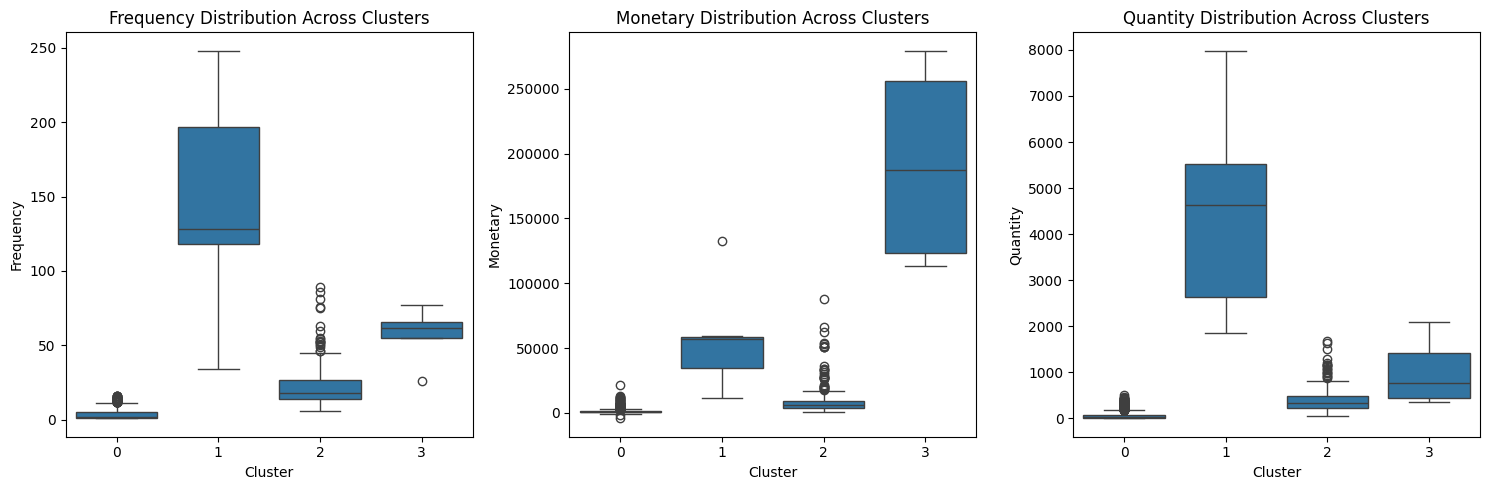

In [13]:
import seaborn as sns

# Create box plots for each feature across clusters
plt.figure(figsize=(15, 5))

# Frequency
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Frequency', data=customer_features)
plt.title('Frequency Distribution Across Clusters')

# Monetary
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Monetary', data=customer_features)
plt.title('Monetary Distribution Across Clusters')

# Quantity
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Quantity', data=customer_features)
plt.title('Quantity Distribution Across Clusters')

plt.tight_layout()
plt.show()

### ** Conclusion**
Based on the box plots:

- **Cluster 3**: 
These are high-spending and active customers. This cluster includes customers who have registered a large number of invoices and spent significant amounts of money.

- **Cluster 0**: 
These are low-activity and low-spending customers. This cluster includes customers who have registered only a few invoices and spent small amounts of money.

- **Cluster 1 and 2**: 
These are moderate customers. These clusters include customers whose purchasing behavior is more balanced compared to the other two clusters. 


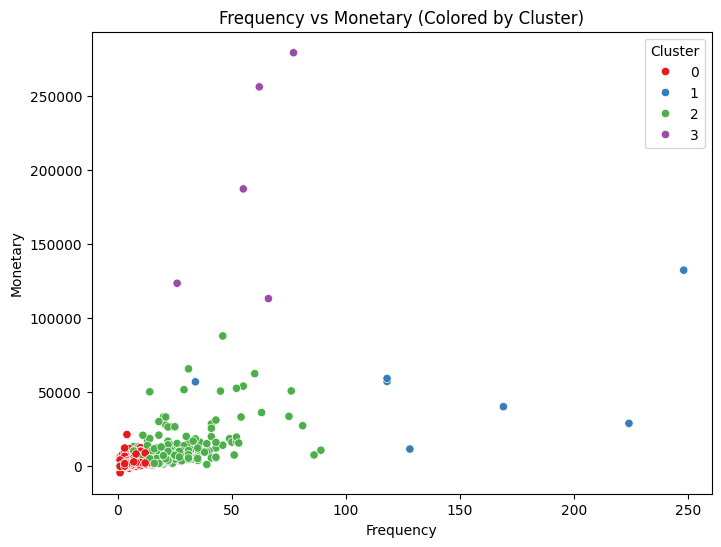

In [14]:
# Scatter plot of Frequency vs Monetary, colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=customer_features, palette='Set1')
plt.title('Frequency vs Monetary (Colored by Cluster)')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

###  Scatter Plot (Frequency vs Monetary):
The scatter plot helps us visualize the relationship between customer activity (`Frequency`) and the amount spent (`Monetary`). This plot provides the following insights:

- **High-spending and active customers**: Points located at the top and to the right of the plot.  
- **Low-activity and low-spending customers**: Points located at the bottom and to the left of the plot.  
- **Moderate customers**: Points located in the middle region of the plot.

---

###  Why didn’t we use other features (like Quantity)?

####  Importance of `Quantity` (Number of products purchased):
- `Quantity` is also an important feature, as it shows how many products a customer has purchased. However, this feature is directly related to the number of products, not the total amount spent.  
- While `Monetary` represents the total amount spent, `Quantity` only reflects the number of products purchased. Although these two features may be related, the scatter plot between `Frequency` and `Monetary` provides the best representation of customer value and activity.

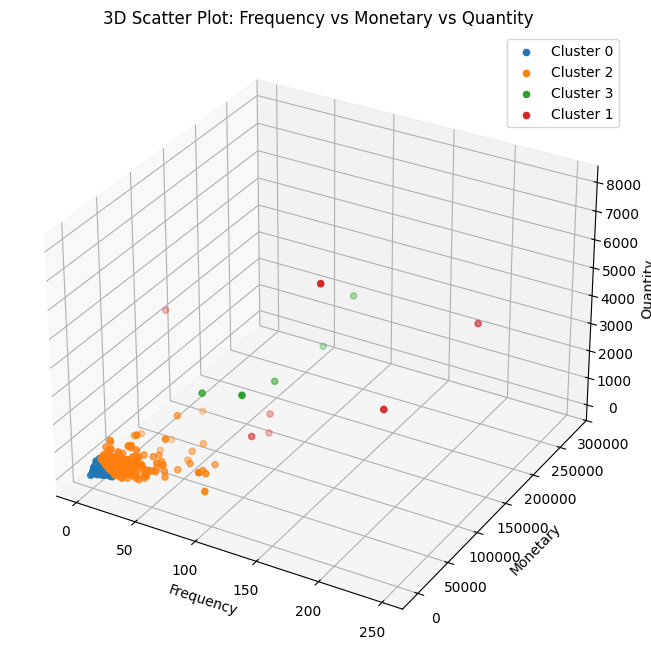

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in customer_features['Cluster'].unique():
    cluster_data = customer_features[customer_features['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Frequency'], 
        cluster_data['Monetary'], 
        cluster_data['Quantity'], 
        label=f'Cluster {cluster}'
    )

# Set labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Quantity')
ax.set_title('3D Scatter Plot: Frequency vs Monetary vs Quantity')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for the current clustering
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.77


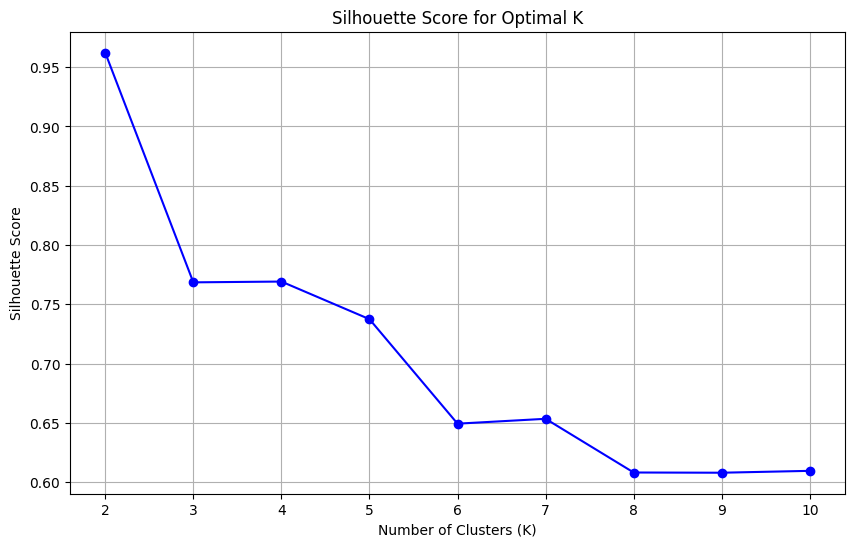

In [17]:
# Calculate Silhouette Scores for different values of K
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()